<a href="https://colab.research.google.com/github/tusharvatsa32/VisTransformers/blob/main/COCO_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/clive819/Modified-DETR

Cloning into 'Modified-DETR'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 109 (delta 63), reused 72 (delta 30), pack-reused 0
Receiving objects: 100% (109/109), 26.23 KiB | 6.56 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [26]:
import os, os.path

In [16]:
!mkdir coco

In [17]:
%cd coco

/content/coco


In [18]:
!mkdir images

In [19]:
!mkdir annotations

In [20]:
!pwd

/content/coco


In [22]:
%cd images

/content/coco/images


In [23]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2021-04-19 22:30:12--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.242.212
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.242.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  35.6MB/s    in 9m 2s   

2021-04-19 22:39:14 (34.0 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [24]:
!pwd

/content/coco/images


In [25]:
!unzip train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000259556.jpg  
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/00

In [41]:
l = os.listdir('/content/coco/images/train2017')
print("number of images = ", len(l))

number of images =  118287


In [42]:
!pwd

/content/coco/images


In [43]:
%cd ..
%cd annotations

/content/coco
/content/coco/annotations


In [44]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-04-19 22:48:17--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.78.52
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.78.52|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  36.2MB/s    in 7.2s    

2021-04-19 22:48:25 (33.5 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [45]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [48]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [49]:
!pwd

/content/coco/annotations


In [50]:
%cd ..

/content/coco


In [53]:
dataDir='annotations'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# dataType='val2017'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [54]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=18.41s)
creating index...
index created!


In [55]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor outdoor sports kitchen vehicle furniture accessory food person animal electronic appliance


In [74]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds)
imgIds = coco.getImgIds(imgIds = imgIds)
print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[1, 18, 41]
[379520, 55809, 46978, 438915, 500100, 209028, 89350, 341623, 306440, 76937, 372874, 22796, 282768, 360595, 366484, 410005, 172310, 449560, 557721, 22427, 365340, 363549, 354721, 47909, 125351, 312233, 28842, 304173, 241837, 560561, 88754, 429236, 536244, 380724, 55478, 23737, 377278, 411583, 476736, 461632, 463044, 569158, 102599, 231240, 296782, 48595, 558036, 518613, 441470, 493020, 297692, 162396, 547421, 176229, 392166, 251368, 255209, 353644, 155117, 551795, 556149, 45175, 568187, 158718, 575615]
[379520, 55809, 46978, 438915, 500100, 209028, 89350, 306440, 76937, 372874, 22796, 282768, 360595, 366484, 410005, 172310, 449560, 557721, 22427, 365340, 363549, 354721, 47909, 125351, 312233, 28842, 304173, 241837, 560561, 88754, 429236, 536244, 380724, 55478, 23737, 377278, 411583, 476736, 461632, 463044, 569158, 102599, 231240, 296782, 48595, 558036, 518613, 158718, 45175, 493020, 297692, 162396, 547421, 176229, 392166, 251368, 255209, 353644, 155117, 551795, 556149, 3416

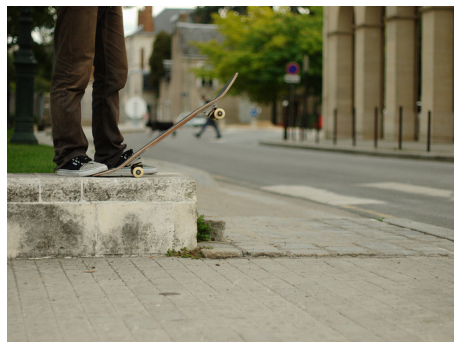

In [76]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [77]:
!pwd

/content/coco


In [78]:
import json

with open('annotations/annotations/instances_train2017.json') as f:
  data = json.load(f)

In [84]:
data['annotations'][0]

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [85]:
for i in data:
  print(i)

info
licenses
images
annotations
categories


In [86]:
data['images']

[{'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'date_captured': '2013-11-14 11:18:45',
  'file_name': '000000391895.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'height': 360,
  'id': 391895,
  'license': 3,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg',
  'date_captured': '2013-11-14 11:38:44',
  'file_name': '000000522418.jpg',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'height': 480,
  'id': 522418,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/train2017/000000184613.jpg',
  'date_captured': '2013-11-14 12:36:29',
  'file_name': '000000184613.jpg',
  'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg',
  'height': 336,
  'id': 184613,
  'license': 3,
  'width': 500},
 {'coco_url': 'http://images.cocodataset.org/train2017/000000318219.jpg',
  'date_captured': '2013-11-14 13

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
!pwd

/content/coco


In [89]:
%cd ..

/content


In [91]:
%cd drive

/content/drive


In [95]:
%cd MyDrive

/content/drive/MyDrive


In [96]:
!ls

 02_prob_lin_alg_review_pgrover.gdoc   literature_survey.docx
 18661HW2			      'Rituraj_Singh_19Jan2020 (1).pdf'
 CMU_I20_Original.pdf		       Rituraj_Singh_19Jan2020.pdf
'Colab Notebooks'		       super_hard_to_get_result.npy
 DLproject			       tushar.svg
 DTU_All8sems_marksheets.pdf


In [98]:
%cd ../..

/content


In [99]:
!ls

coco  drive  sample_data


In [103]:
!cp -a /content/coco /content/drive/MyDrive/DLproject/

In [113]:
# !cp -R /content/coco/annotations/ /content/drive/MyDrive/DLproject/coco/